**Theoretical**

Answer 1.

R-squared (R²) indicates the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher value means a better fit.




Answer 2.

Linearity: The relationship between the independent and dependent variables is linear.

Independence: Observations are independent of each other.

Homoscedasticity: Constant variance of errors.

Normality: Residuals are normally distributed.

No multicollinearity: Independent variables are not highly correlated.



Answer 3.


R-squared increases with more variables, even if they are irrelevant.

Adjusted R-squared adjusts for the number of predictors, providing a more accurate measure of model performance when comparing models with different numbers of features.


Answer 4.

MSE is used to measure the average of the squares of the errors. It gives more weight to larger errors, making it useful for identifying models that make significant prediction mistakes.



Answer 5.

It means that approximately 85% of the variation in the dependent variable is explained by the model, adjusted for the number of predictors used.



Answer 6.

Histogram or Q-Q plot of residuals.

Shapiro-Wilk test or Kolmogorov-Smirnov test.


Answer 7.


Multicollinearity occurs when independent variables are highly correlated. It makes coefficient estimates unstable and inflates standard errors.



Answer 8.


MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It’s the average absolute difference between predicted and actual values.



Answer 9.


Standardizes the process.

Makes code cleaner and easier to maintain.

Ensures repeatability and consistency.

Simplifies hyperparameter tuning and model evaluation.




Answer 10.


RMSE is in the same unit as the target variable, making it easier to interpret compared to MSE, which is in squared units.


Answer 11.

Pickling is the process of converting a Python object into a byte stream to save it to a file. It’s useful for saving trained models for reuse without retraining.


Answer 12.

It means the model explains a large portion of the variance in the dependent variable.

Answer 13.

It can lead to:

Biased or inefficient estimates.

Invalid hypothesis tests.

Poor predictive performance.

Answer 14.

Remove or combine correlated predictors.

Use regularization techniques like Ridge or Lasso regression.

Apply PCA to reduce dimensionality.

Answer 15.

It reduces overfitting, improves model interpretability, and often enhances performance by removing irrelevant or redundant features.

Answer 16.


Adjusted R
2
 =1−(
n−p−1
(1−R
2
 )(n−1)
​
 )
Where:

n = number of observations,

p = number of predictors.

Answer 17.


Because it squares the error terms, large errors (caused by outliers) get disproportionately large weights.


Answer 18.


Homoscedasticity ensures that residuals have constant variance, a key assumption for valid hypothesis tests and confidence intervals.



Answer 19.


RMSE is the square root of MSE. It measures the average magnitude of the errors in the same units as the output variable.

Answer 20.


Pickled files can execute arbitrary code when loaded, which poses a security risk if the file is from an untrusted source.



 Answer21.

Joblib (for NumPy arrays).

ONNX (Open Neural Network Exchange).

Model-specific exporters like .h5 for Keras or .pkl with proper safeguards.

 Answer22.


It refers to non-constant variance of residuals. It violates linear regression assumptions and can lead to inefficient estimates and misleading inferences.


Answer23.


They allow the model to account for the effect of one variable depending on the value of another, capturing more complex relationships.





**Practical:**

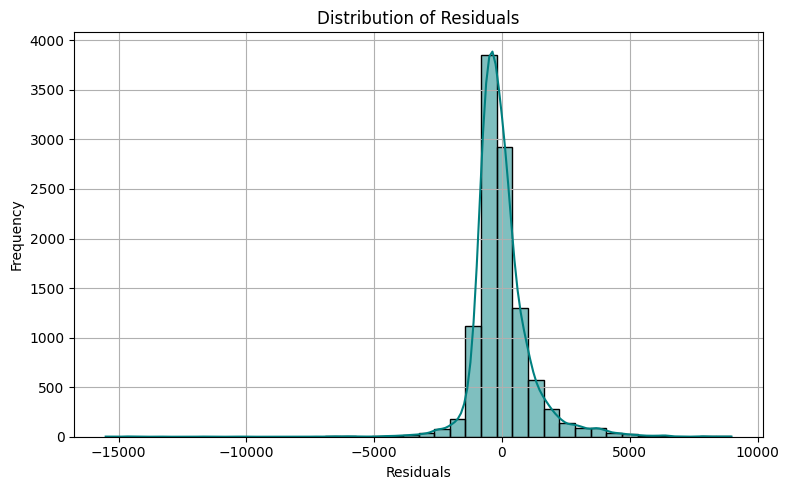

In [3]:
#ANswer 1

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the diamonds dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Step 2: One-hot encode categorical features
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Step 3: Define features and target
X = diamonds_encoded.drop("price", axis=1)
y = diamonds_encoded["price"]

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and compute residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Step 7: Visualize the distribution of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="teal")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
#Answer 2

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Generate synthetic data for regression
X, y = make_regression(n_samples=500, n_features=2, noise=15, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 6: Print the results
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 196.13
Mean Absolute Error (MAE): 10.73
Root Mean Squared Error (RMSE): 14.00


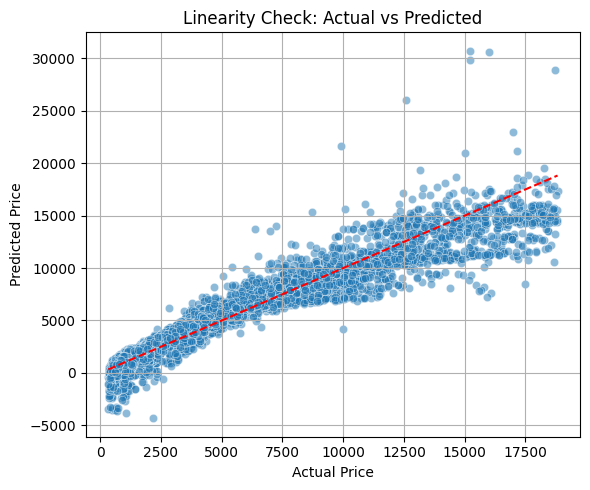

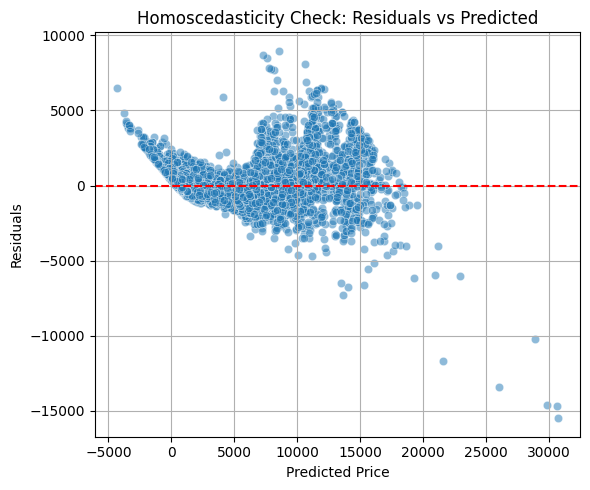

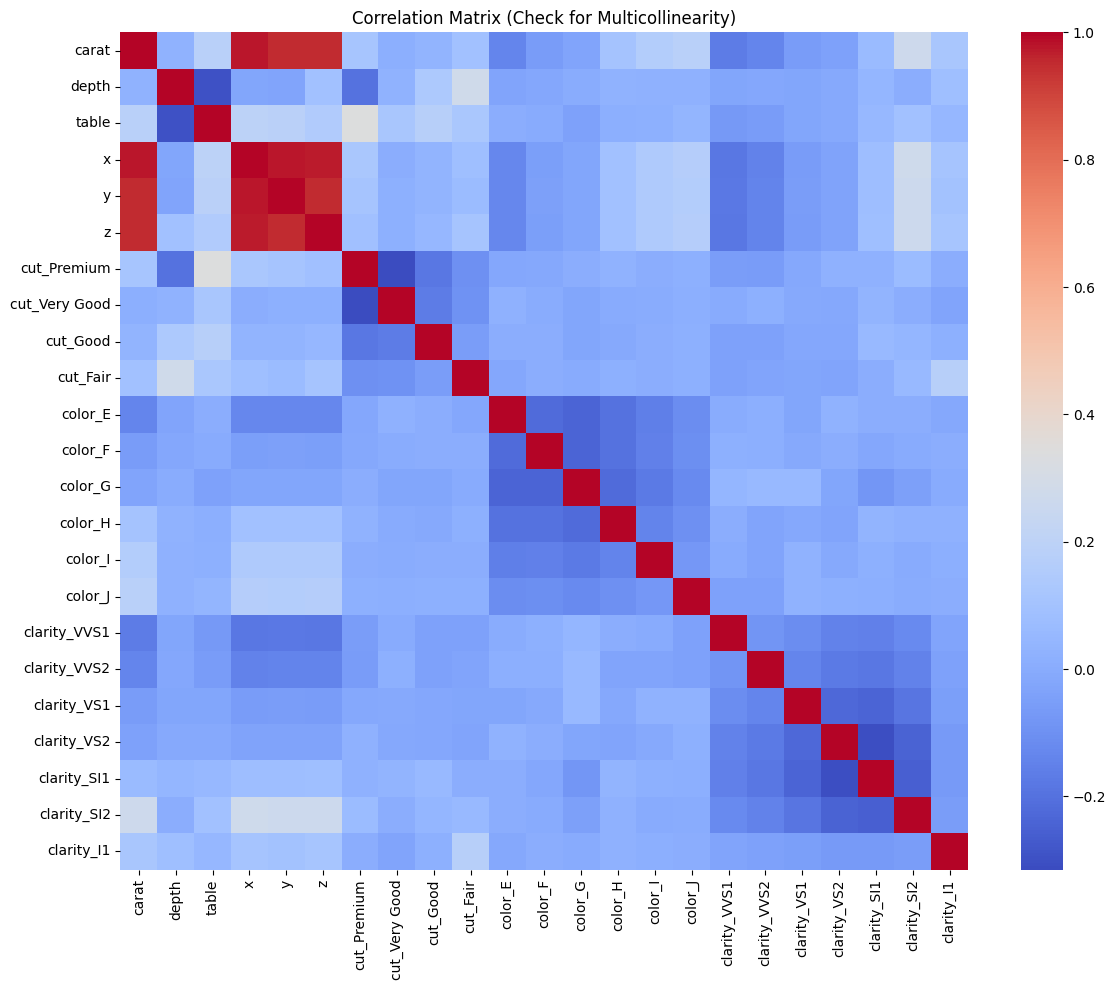

In [4]:
#Answer 3

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load and prepare the dataset
diamonds = sns.load_dataset("diamonds").dropna()
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Step 2: Define features and target
X = diamonds_encoded.drop("price", axis=1)
y = diamonds_encoded["price"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# ---- A. Linearity: Plot predicted vs actual ----
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity Check: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- B. Homoscedasticity: Plot residuals vs predicted ----
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- C. Multicollinearity: Correlation matrix ----
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix (Check for Multicollinearity)")
plt.tight_layout()
plt.show()


In [5]:
#Answe 4

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Step 2: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Step 4: Evaluate each model in a pipeline
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: R-squared Score = {r2:.4f}")


Linear Regression: R-squared Score = 0.9911
Ridge Regression: R-squared Score = 0.9911
Lasso Regression: R-squared Score = 0.9911


In [6]:
#Answer 5

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data for simple linear regression (1 feature)
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Print model parameters
print("Simple Linear Regression Model")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")


Simple Linear Regression Model
Coefficient: 86.8180
Intercept: 1.8346
R-squared Score: 0.9681


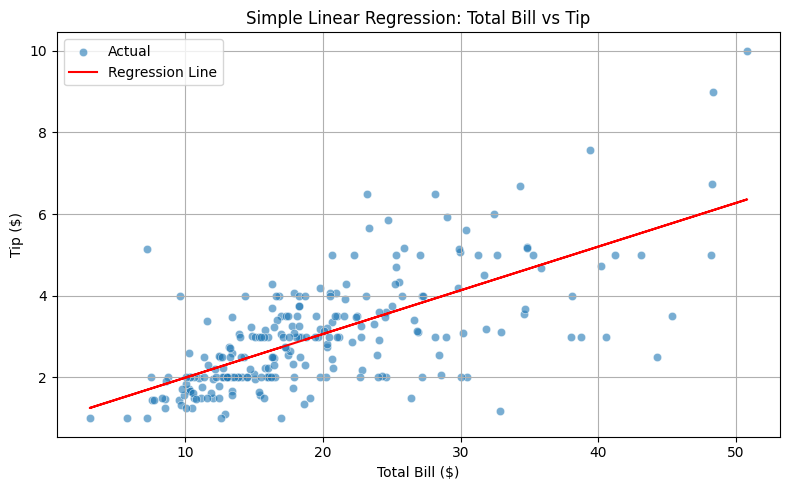

Simple Linear Regression: Total Bill vs Tip
Coefficient (Slope): 0.1070
Intercept: 0.9252
R-squared Score: 0.5449


In [7]:
#Answer 6

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Step 2: Define features and target
X = tips[["total_bill"]]
y = tips["tip"]

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict tips for visualization
y_pred = model.predict(X)

# Step 6: Plot regression line with data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_bill", y="tip", data=tips, label="Actual", alpha=0.6)
plt.plot(tips["total_bill"], y_pred, color="red", label="Regression Line")
plt.title("Simple Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Print model details
print("Simple Linear Regression: Total Bill vs Tip")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {model.score(X_test, y_test):.4f}")



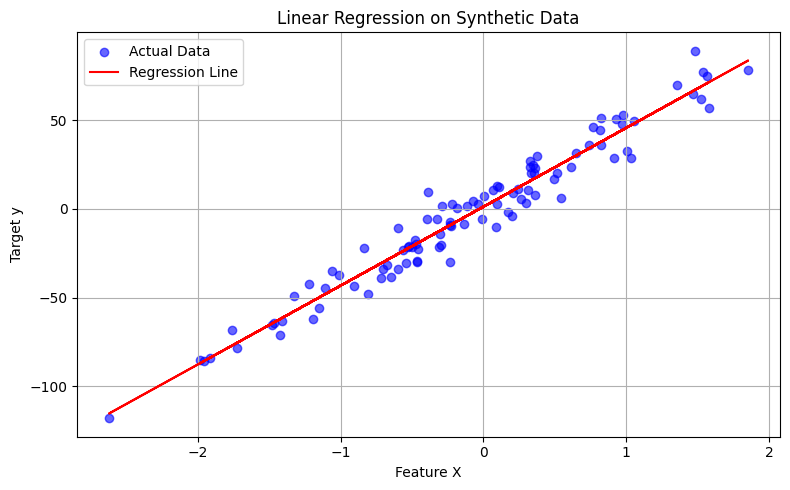

Predicted values for new inputs:
X = 50 --> Predicted y = 2223.02
X = 100 --> Predicted y = 4444.88
X = 150 --> Predicted y = 6666.74


In [8]:
#Answer 7

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict using the model
y_pred = model.predict(X)

# Step 4: Plot the data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Predict new values
X_new = np.array([[50], [100], [150]])
y_new_pred = model.predict(X_new)

# Step 6: Print predictions
print("Predicted values for new inputs:")
for i, x_val in enumerate(X_new):
    print(f"X = {x_val[0]} --> Predicted y = {y_new_pred[i]:.2f}")


In [9]:
#Answer 8

import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Pickle the trained model
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ The linear regression model has been pickled and saved as 'linear_model.pkl'.")


✅ The linear regression model has been pickled and saved as 'linear_model.pkl'.


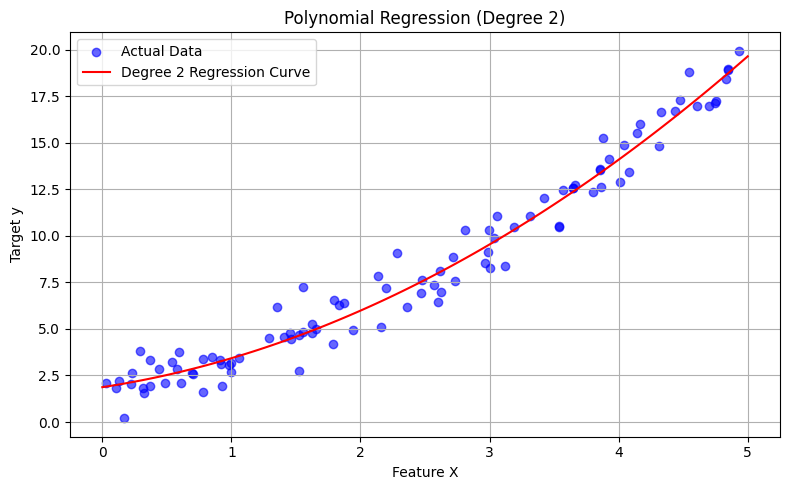

In [14]:
#Answer 9

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Generate synthetic nonlinear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
# Ensure y has the same shape as X by removing .ravel()
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Step 2: Create a pipeline with PolynomialFeatures and LinearRegression
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Step 3: Predict values for plotting
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Step 4: Plot the original data and polynomial regression curve
plt.figure(figsize=(8, 5))
# Now X and y have compatible shapes (100, 1)
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree} Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5: Print model coefficients (optional)
# print("Model Coefficients:", model.named_steps['linearregression'].coef_)
# print("Model Intercept:", model.named_steps['linearregression'].intercept_)

In [15]:
#Answer 10

import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Generate random synthetic data
np.random.seed(1)
X = np.random.rand(100, 1) * 10  # Random X values between 0 and 10
noise = np.random.randn(100, 1) * 2  # Random noise
y = 5 + 1.5 * X + noise  # Linear relationship with noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print model's coefficient and intercept
print("Simple Linear Regression on Random Synthetic Data:")
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Simple Linear Regression on Random Synthetic Data:
Coefficient (slope): 1.4370
Intercept: 5.4739


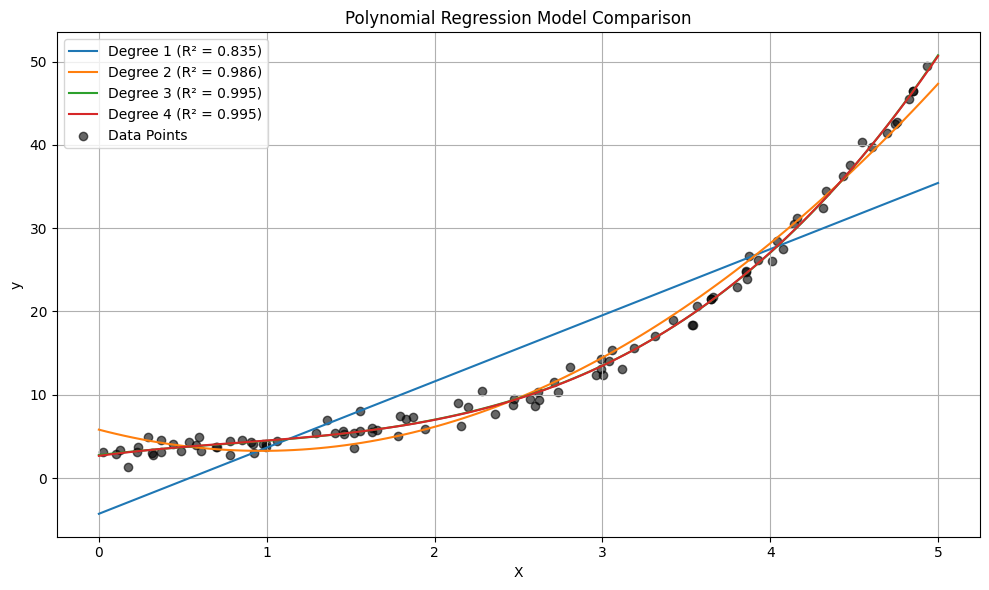

R-squared Scores for Different Degrees:
Degree 1: R² = 0.8351
Degree 2: R² = 0.9862
Degree 3: R² = 0.9951
Degree 4: R² = 0.9951


In [18]:
#Answer 11

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Step 1: Generate nonlinear synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
# Ensure y has the same shape as X for plotting and fitting
# Removed .ravel() to keep y as (100, 1)
y = 0.5 * X**3 - X**2 + 2 * X + 3 + np.random.randn(100, 1)

# Step 2: Define degrees to evaluate
degrees = [1, 2, 3, 4]
r2_scores = {}

# Step 3: Fit and evaluate polynomial models of various degrees
plt.figure(figsize=(10, 6))
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_plot)

    # Calculate R-squared
    y_fit = model.predict(X)
    r2 = r2_score(y, y_fit)
    r2_scores[degree] = r2

    # Plot regression curve
    plt.plot(X_plot, y_pred, label=f'Degree {degree} (R² = {r2:.3f})')

# Step 4: Plot original data
# X and y are now both (100, 1), which is compatible
plt.scatter(X, y, color='black', alpha=0.6, label='Data Points')
plt.title("Polynomial Regression Model Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Print R-squared scores for comparison
print("R-squared Scores for Different Degrees:")
for degree, score in r2_scores.items():
    print(f"Degree {degree}: R² = {score:.4f}")


In [19]:
#answer 12

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with two features
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10
X2 = np.random.rand(100, 1) * 5
X = np.hstack([X1, X2])
y = 3 * X1 + 2 * X2 + 4 + np.random.randn(100, 1)
y = y.ravel()

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Output results
print("Linear Regression with Two Features:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {r2:.4f}")



Linear Regression with Two Features:
Coefficients: [2.97500221 2.15743475]
Intercept: 3.7933
R-squared Score: 0.9933


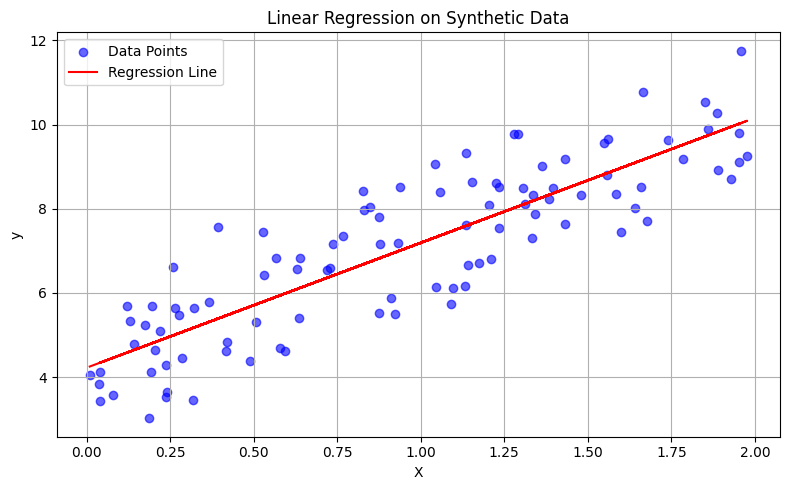

In [20]:
#Answer 13

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Step 2: Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values for plotting
y_pred = model.predict(X)

# Step 4: Plot the data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression on Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
#ANswer 14

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Generate synthetic dataset with multiple features
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
X_df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Step 2: Fit linear regression model (optional, just to simulate a real use case)
model = LinearRegression()
model.fit(X_df, y)

# Step 3: Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Step 4: Print the VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


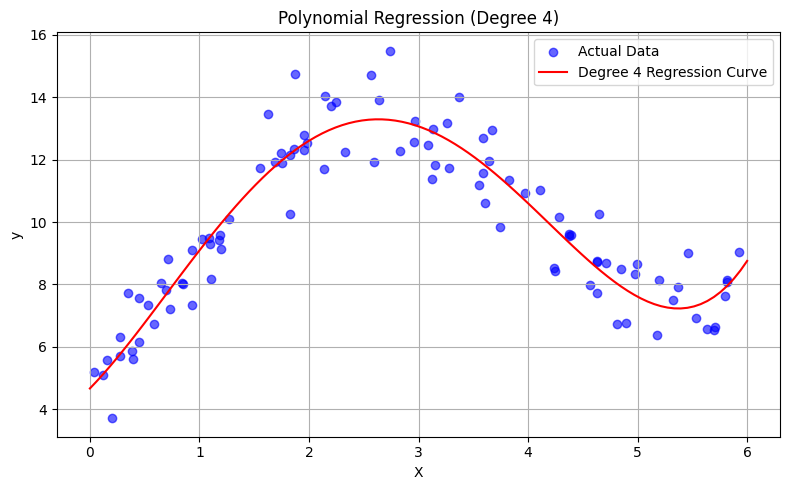

In [23]:
#ANswer 15

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Generate synthetic data with a degree-4 relationship
np.random.seed(42)
X = np.sort(6 * np.random.rand(100, 1), axis=0)
# Ensure y has the shape (100, 1) by not calling ravel() on the noise
y = 0.1 * X**4 - X**3 + 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1)

# Step 2: Create and train the polynomial regression model
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Note: model.fit expects y to be 1D for a single target, or 2D (n_samples, n_targets)
# For plotting, we need X and y to have compatible shapes for scatter.
# Since X is (100, 1), making y (100, 1) is compatible for scatter.
# However, sklearn's fit method for LinearRegression expects y to be (n_samples,)
# Let's train the model with a raveled y, but keep the (100, 1) shape for plotting.
model.fit(X, y.ravel()) # Train with 1D y as sklearn expects

# Step 3: Predict for a smooth curve
X_plot = np.linspace(0, 6, 100).reshape(-1, 1)
y_plot = model.predict(X_plot).reshape(-1, 1) # Reshape y_plot back to (100, 1) for plotting

# Step 4: Plot original data and regression curve
plt.figure(figsize=(8, 5))
# Now X and y are both (100, 1), compatible for scatter
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label='Degree 4 Regression Curve')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
#answer 16

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data for multiple linear regression
X, y = make_regression(n_samples=200, n_features=4, noise=10, random_state=42)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create pipeline with standardization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Step 4: Fit the pipeline model
pipeline.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 6: Output R-squared score
print("Pipeline with Standardization and Linear Regression:")
print(f"R-squared Score: {r2:.4f}")


Pipeline with Standardization and Linear Regression:
R-squared Score: 0.9937


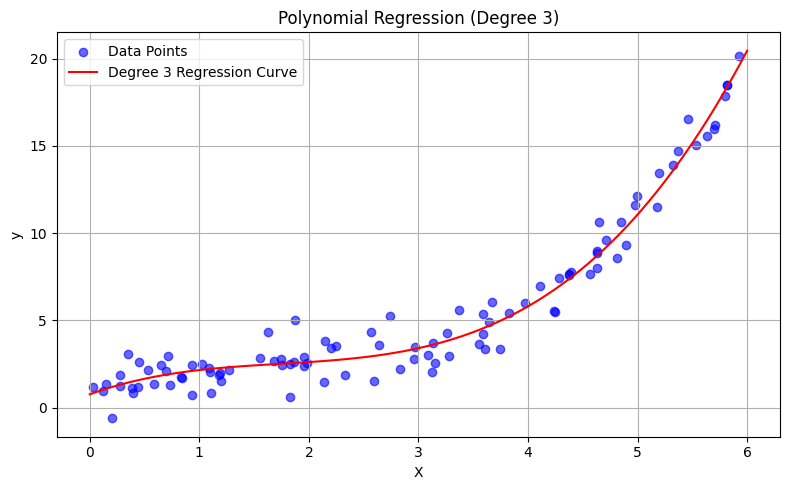

In [26]:
#Answer 17

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Generate synthetic nonlinear data
np.random.seed(42)
X = np.sort(6 * np.random.rand(100, 1), axis=0)
# Ensure y has the shape (100, 1) by explicitly adding noise with shape (100, 1)
y = 0.2 * X**3 - X**2 + 2 * X + 1 + np.random.randn(100, 1) # Added .reshape(-1, 1) to noise to ensure shape (100, 1)


# Step 2: Create polynomial regression model (degree 3)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit with y flattened to 1D as sklearn expects
model.fit(X, y.ravel())

# Step 3: Predict and plot
X_plot = np.linspace(0, 6, 100).reshape(-1, 1)
y_plot = model.predict(X_plot).reshape(-1, 1) # Reshape prediction back to (100, 1) for consistent plotting

# Step 4: Visualization
plt.figure(figsize=(8, 5))
# X and y are now both (100, 1), compatible for scatter
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label='Degree 3 Regression Curve')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#Answer 18

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 5 features
X, y = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Output results
print("Multiple Linear Regression with 5 Features")
print("R-squared Score:", round(r2, 4))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Multiple Linear Regression with 5 Features
R-squared Score: 0.9787
Model Coefficients: [ 7.44026995  5.00841388 51.01138054 81.50530213 26.33008495]
Intercept: -0.030573782565653573


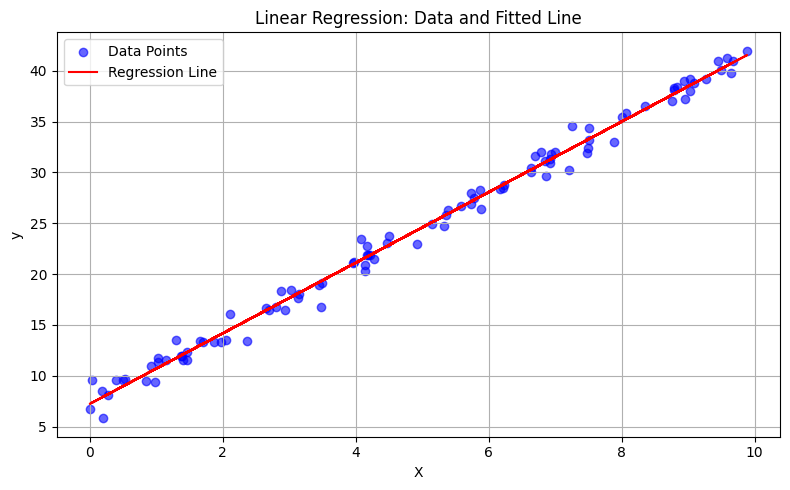

In [28]:
#Answer 19

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic linear data
np.random.seed(1)
X = 10 * np.random.rand(100, 1)
y = 3.5 * X + 7 + np.random.randn(100, 1)

# Step 2: Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 3: Plot data points and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression: Data and Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
#Answer 20

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 100
X = np.random.rand(n_samples, 3)  # 3 features
# Define true coefficients
true_coefs = np.array([1.5, -2.0, 3.0])
# Generate target with some noise
y = X @ true_coefs + np.random.randn(n_samples) * 0.5

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R-squared score: {r2:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")


R-squared score: 0.6751
Coefficients: [ 1.55294884 -2.037697    3.34302962]
Intercept: -0.0425


In [30]:
#Answer 21

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=3, noise=0.4, random_state=42)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Serialize the model to a file using joblib
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Later... deserialize the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded from file.")

# Verify loaded model works
score = loaded_model.score(X_test, y_test)
print(f"R-squared score of loaded model: {score:.4f}")


Model saved to linear_regression_model.joblib
Model loaded from file.
R-squared score of loaded model: 1.0000


In [31]:
#Answer 22

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Let's check the dataset
print(tips.head())

# Select features and target
# Use 'total_bill' as target
# Use 'size' (numerical) and categorical features: 'sex', 'smoker', 'day', 'time'
X = tips[['sex', 'smoker', 'day', 'time', 'size']]
y = tips['total_bill']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")
print("Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
R-squared score: 0.4308
Coefficients:
size: 5.2601
sex_Female: -1.3439
smoker_No: -3.0543
day_Fri: -3.6882
day_Sat: -4.1665
day_Sun: -5.0181
time_Dinner: 6.8168
Intercept: 7.4474


In [32]:
#Answer 23

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
n_features = 5
X = np.random.randn(n_samples, n_features)

# True coefficients with some sparsity
true_coefs = np.array([1.5, -2.0, 0.0, 3.0, 0.0])

# Target with noise
y = X @ true_coefs + np.random.randn(n_samples) * 1.0

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # You can tune alpha for regularization strength

# Fit models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# R-squared scores
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Linear Regression:")
print(f"  Coefficients: {lin_reg.coef_}")
print(f"  Intercept: {lin_reg.intercept_:.4f}")
print(f"  R-squared: {r2_lin:.4f}\n")

print("Ridge Regression:")
print(f"  Coefficients: {ridge_reg.coef_}")
print(f"  Intercept: {ridge_reg.intercept_:.4f}")
print(f"  R-squared: {r2_ridge:.4f}")


Linear Regression:
  Coefficients: [ 1.65372091e+00 -1.90478724e+00  3.40320451e-02  3.04550933e+00
 -2.49614162e-03]
  Intercept: -0.1115
  R-squared: 0.9246

Ridge Regression:
  Coefficients: [ 1.6295348  -1.88092522  0.02836701  3.00230339 -0.00436562]
  Intercept: -0.1068
  R-squared: 0.9235


In [33]:
#Answer 24

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation using R-squared as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print cross-validation scores and their average
print("Cross-validation R-squared scores:", cv_scores)
print(f"Mean R-squared score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation R-squared scores: [0.98012075 0.9844046  0.98981268 0.98405405 0.97718464]
Mean R-squared score: 0.9831
Standard deviation: 0.0043


In [34]:
#Answer 25

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create synthetic data (1D feature for visualization clarity)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2 + np.random.randn(100, 1) * 3  # cubic relationship with noise
y = y.ravel()

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees to test
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create a pipeline that first transforms features, then fits the model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} polynomial regression R-squared: {r2:.4f}")




Degree 1 polynomial regression R-squared: 0.5951
Degree 2 polynomial regression R-squared: 0.8143
Degree 3 polynomial regression R-squared: 0.8855
Degree 4 polynomial regression R-squared: 0.8793
Degree 5 polynomial regression R-squared: 0.8766
